<a href="https://colab.research.google.com/github/MaikoLeblanc98/tp1_vision/blob/master/tp1_red_ball_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision industrielle - TP initiatiation au traitement d'image avec Python

L'objectif de ce TP est de découvrir et d'utiliser des outils de traitement d'images. Le langage de programmation Python sera utilisé, ainsi que les librairies scientifiques suivantes:

    - scikit-image
    - NumPy
    - SciPy
    - matplotlib
    
Ces différentes libairies font partie de la *stack* scientifique disponible pour python. D'autres librairies telles que OpenCV, scikit-learn, pandas vous seront présentées lors des TPs suivants.

## A la fin de ce TP vous devriez être capables

	- d'ouvrir une image à partir d'un fichier
	- d'extraire les contours d'une image en niveau de gris
	- d'effectuer des opérations de filtrage linéaire
	- d'effectuer des opérations morphologiques
	- de détecter la position d'un objet coloré



## Aide 
pour obtenir de l'aide sur une fonction : 
   
    - ?nom_fonction 
    - help(nom_fonction)
    
Voici une liste de ressources en ligne qui pourront vous être utiles au cours du TP:

 - IPython notebook introduction: http://opentechschool.github.io/python-data-intro/core/notebook.html
 - Numpy quickstart: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
 - Numpy pour le traitement d'image http://scikit-image.org/docs/dev/user_guide/numpy_images.html

 

### Exécuter la cellule suivante afin de charger l'ensemble des outils nécessaires

In [15]:
from functools import partial
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import imageio
import skimage.morphology
import skimage.segmentation
import skimage.feature
import skimage
%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

def format_coord(x, y, image):
    x = int(x + 0.5)
    y = int(y + 0.5)
    try:
        val = str(image[y, x])
    except IndexError:
        val = "?"
    return "color={} @ [{}, {}]".format(val, y, x)

def display_image_nb(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.matshow(image, cmap=plt.gray())
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def display_image_color(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def draw_rectangle(y1, x1, y2, x2, color='red', ax=None):
    """ Add a rectangle on an image """
    if ax is None:
        ax = pyplot.gca()
    rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

print("OK let's go")

OK let's go


## 1. Introduction au tableau numpy pour le traitement d'image

Les images peuvent être représentées sous forme de tableaux multi-dimensionnels. Comme nous sommes en Python, nous utilisons la librairie NumPy (NumPy is the fundamental package for scientific computing with Python: http://www.numpy.org).

Une image en niveaux de gris correspond à un tableau à deux dimensions. Le code suivant permet de créer un tel tableau.

In [2]:
image_niveau_de_gris = np.array([[8, 9, 10, 11], [5, 3, 2, 1], [8, 9, 0, 0]])
print(image_niveau_de_gris)

[[ 8  9 10 11]
 [ 5  3  2  1]
 [ 8  9  0  0]]


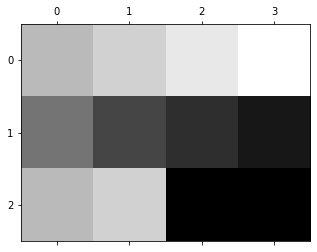

In [16]:
fig, ax = display_image_nb(image_niveau_de_gris)


<span style="color:red">Questions</span>

Quelle est valeur associée au pixel [0, 2]  (i.e ligne 0, colonne 2)




In [ ]:
10

Vous pouvez accéder aux valeurs contenues dans l'image en utilisant la syntaxe suivante :

  image[ligne, colonne]

Compléter le code suivant pour acéder à la valeur associée au pixel de la ligne 0 et de la colonne 2

In [4]:
image_niveau_de_gris[0,2]

10

Pour représenter une image avec plusieurs canaux (par exemple une image RGB), on utilise une nouvelle dimension.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e570bd710>)

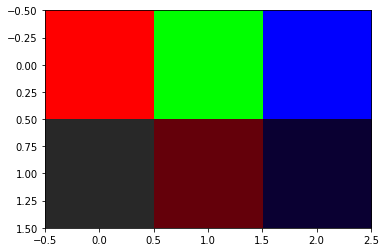

In [17]:
image_rgb = [[[255, 0, 0], [0, 255, 0], [0, 0, 255]], [[40, 40, 40], [100, 0, 10], [10, 0, 50]]]
image_rgb = np.array(image_rgb, dtype=np.uint8)
display_image_color(image_rgb)

Pour sélectionner un canal d'une image couleur vous pouvez utiliser la syntaxe suivante: 
    
    image[:, :, 0] qui selectionnera seulement le canal 0 (i.e Red pour une image RGB)
    image[:, :, 1] qui selectionnera le canal 1, etc..
    image[:, :, (0,1)] qui selectionnera le canal 0 et le canal 1
    
Pour remplacer la valeur d'un pixel vous pouvez utiliser la syntaxe suivante:

    image[1,5,0] = 8  # qui remplacera le contenu du pixel [1,5] du canal 0 

Vous pouvez aussi remplacer tous les pixels d'un canal

    image[:, :, 0] = 8


<span style="color:red">Questions</span>

Dans l'image *image_rgb* : enlever la composante rouge.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e57242978>)

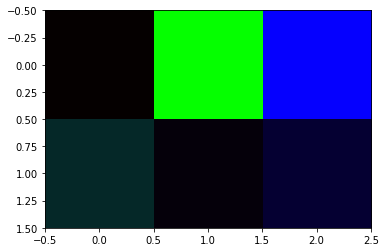

In [20]:
image_rgb[:,:,0] = 5  # enlever le rouge..
display_image_color(image_rgb)


C'est tout pour l'introduction sur les tableaux NumPy. N'hésitez pas à tester la construction de tableau et les opérations par vous-même, ainsi que les quelques fonctions de la cellule suivante.

plus d'info ici:
http://www.scipy-lectures.org/intro/numpy/array_object.html


In [ ]:
# Test np.ones

# Test np.random.random

# what is the .shape of an array ?

# 2. Opérations sur les images:


Dans cette partie nous travaillerons avec l'image de référence *chelsea*. 

Vous pouvez néanmoins utiliser l'image que vous souhaitez.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e5730d400>)

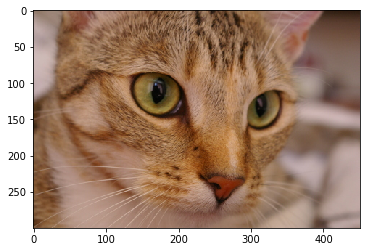

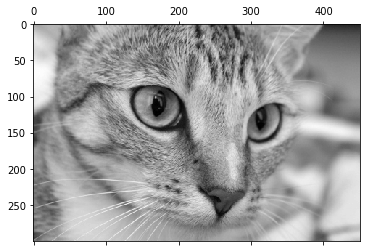

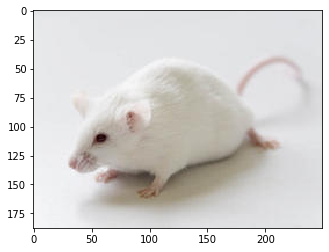

In [18]:
from skimage.data import chelsea
%matplotlib inline
image = chelsea()
image_nb = skimage.color.rgb2grey(image)
#?chelsea
display_image_color(image)
display_image_nb(image_nb)
import imageio
souris = imageio.imread('http://static.wamiz.fr/images/animaux/rongeurs/medium/souris.jpg')
display_image_color(souris)

## 2.1 Opérateurs pixels à pixels

- Donner la dimension de l'image
- Calculer la moyenne, max, min et somme de l'image
- Créer le mask binaire (i.e une image binaire) qui vaut 1 partout où l'image *image_nb* a une valeur <= 0.4
- Créer une nouvelle image *image_nb_thresholded* dans laquelle les pixels du masque sont mis à 0
- Afficher cette image
- Créer et afficher une nouvelle image dans laquelle les pixels de valeurs comprises entre 0.4 et 0.8 sont mis à zéros

Un peu plus compliqué:
- Créer un masque ne correspondant qu'à la partie basse de l'image
- L'utiliser pour calculer la moyenne, max, min, et somme
- Inverser la partie basse de l'image



Les fonctions qui peuvent vous être utiles sont: 

    display_image_nb, np.min, np.max, np.sum, np.mean, np.abs, np.shape, np.zeros, np.ones

In [31]:
print('Dimension de la photo du chat :',image.shape)
print('Dimension de la photo du chat en noir et blanc :', image_nb.shape)
print('Dimension de la photo de la souris :', souris.shape)

Dimension de la photo du chat : (300, 451, 3)
Dimension de la photo du chat en noir et blanc : (300, 451)
Dimension de la photo de la souris : (188, 250, 3)


In [32]:
print('Nombre de pixel de la photo du chat :',image.size)
print('Nombre de pixel de la photo du chat en noir et blanc :', image_nb.size)
print('Nombre de pixel de la photo de la souris :', souris.size)

Nombre de pixel de la photo du chat : 405900
Nombre de pixel de la photo du chat en noir et blanc : 135300
Nombre de pixel de la photo de la souris : 141000


In [54]:
print('Minimum de rouge dans la photo du chat :', image[:,:,0].min(),
      '\nMinimum de vert dans la photo du chat : ', image[:,:,1].min(),
      '\nMinimum de bleu dans la photo du chat: ', image[:,:,2].min() )

Minimum de rouge dans la photo du chat : 2 
Minimum de vert dans la photo du chat :  4 
Minimum de bleu dans la photo du chat:  0


In [56]:
print('Maximum de rouge dans la photo du chat :', image[:,:,0].max(),
      '\nMaximum de vert dans la photo du chat : ', image[:,:,1].max(),
      '\nMaximum de bleu dans la photo du chat: ', image[:,:,2].max() )

Maximum de rouge dans la photo du chat : 215 
Maximum de vert dans la photo du chat :  189 
Maximum de bleu dans la photo du chat:  231


In [57]:
print('Somme des rouge dans la photo du chat :', image[:,:,0].sum(),
      '\nSomme des vert dans la photo du chat : ', image[:,:,1].sum(),
      '\nSomme des bleu dans la photo du chat: ', image[:,:,2].sum() )

Somme des rouge dans la photo du chat : 19980169 
Somme des vert dans la photo du chat :  15078438 
Somme des bleu dans la photo du chat:  11743750


In [58]:
print('Minimum dans la photo du chat en noir et blanc :', image_nb[:,0].min(), image_nb[:,1].min())
print('Maximum dans la photo du chat en noir et blanc :', image_nb[:,0].max(), image_nb[:,1].max())
print('Somme dans la photo du chat en noir et blanc :', image_nb[:,0].sum(), image_nb[:,1].sum())

Minimum dans la photo du chat en noir et blanc : 0.16228627450980393 0.16842509803921568
Maximum dans la photo du chat en noir et blanc : 0.7536388235294118 0.7556109803921569
Somme dans la photo du chat en noir et blanc : 145.30288392156865 144.56350352941178


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e4d759cc0>)

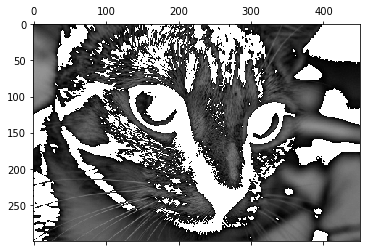

In [66]:
image_nb[image_nb < 0.4] = 1
display_image_nb(image_nb)


In [76]:

size = (300,451)
image_nb_thresholded = np.array(size)
mask = image_nb < 0.4
image_nb_thresholded[mask] = 0
display_image_nb(image_nb_thresholded)


IndexError: ignored

## 2.2 Filtrage

Filtrer l'image *image_nb* avec les filtres suivants :

- un filtre moyenneur
- un filtre laplacien
- un filtre de Sobel
- utiliser un filtre de canny pour extraire les contours

Les fonctions qui peuvent vous être utiles sont:

    scipy.ndimage.convolve, skimage.filters.sobel, skimage.feature.canny


In [12]:
image = skimage.data.camera()
image_nb = skimage.color.rgb2grey(image)
display_image_nb(image_nb)

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e5722a940>)

## 2.3 Opérateurs morphologiques

À l'aide d'un élément structurant de type disk (3,3):


- Effectuer une dilatation (morphological dilation)
- Effecture une érosion (morphological erosion)
- Effectuer une opération de fermeture (morphological closing)
- Effecture une opération d'ouverture (morphological opening)

les fonctions qui peuvent vous être utiles:

    skimage.morphology.disk, skimage.morphology.opening, skimage.morphology.closing, skimage.morphology.dilate, skimage.morphology.erosion

## 3. Application

Le but de cette section est de mettre en application les différentes techniques que vous avez vu jusqu'à présent.

Objectif: détecter où se trouve le ballon dans l'image suivante

![alt text](./images/red_ball.png "image to find")


Cette image est extraite du jeu de données disponible sur le site: http://www.iai.uni-bonn.de/~kleind/tracking/index.htm.
Nous aurons l'occasion de réutiliser ce type de jeu de données dans les prochains TPs.


Votre objectif

    - Trouver où se trouve la balle dans l'image
    
    
Un exemple de résultat: 


![alt text](./images/red_ball_result.png "good result")

    
Voici une liste de fonction qui peut vous être utile:

     skimage.segmentation.mark_boundaries, skimage.color.rgb2lab, skimage.segmentation.clear_border, skimage.morphology.erosion, dilation, opening, closing, skimage.measure.label, skimage.measure.regionprops
     
     
C'est parti.




In [14]:
image = imageio.imread('./image/red_ball.png')
display_image_color(image)

<IPython.core.display.Javascript object>

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6e571aedd8>)

- Calculer l'histogramme de l'image chelsea (skimage.data.chelsea())

ressources:

 - http://scikit-image.org/docs/dev/auto_examples/plot_windowed_histogram.html
 

Charger l'image coins (skimage.data.coins())

- Afficher la pièce de la première colonne, dernière ligne.
- Calculer l'histogramme correspondant à cette pièce.
- Calculer l'histogramme normalisé correspondant à cette pièce, et l'afficher à l'aide d'un graphique.


# Points d'intérets et descripteurs


In [ ]:
image_1 = skimage.img_as_ubyte(skimage.data.astronaut())
image_2 = skimage.img_as_ubyte(skimage.transform.rotate(image_1, 45))
display_image_color(image_1)
display_image_color(image_2)

De façon à faire matcher les deux images nous allons utiliser les points d'intérets et descripteurs ORB.

Plus d'infos sur les descripteurs ORB:
https://www.google.fr/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjj1ZSZx6PSAhVDOhoKHetjBrAQFggcMAA&url=http%3A%2F%2Fwww.willowgarage.com%2Fsites%2Fdefault%2Ffiles%2Forb_final.pdf&usg=AFQjCNHkIXqNk7-N26SZxzcR-8Oe0JBgpQ



Expliquer ce que fait chacune des lignes suivantes:

In [ ]:
descriptor = cv2.ORB_create()
mask = None
key_points_image_1, features_image_1 = descriptor.detectAndCompute(image_1, mask)
key_points_image_2, features_image_2 = descriptor.detectAndCompute(image_2, mask)
image_1_keypoint = cv2.drawKeypoints(image_1, key_points_image_1, None, color=(0, 255,0))
image_2_keypoint = cv2.drawKeypoints(image_2, key_points_image_2, None, color=(0, 255,0))

display_image_color(image_1_keypoint)
display_image_color(image_2_keypoint)

Utilisez le code suivant pour faire matcher les deux ensembles de points

In [ ]:
matcher = cv2.DescriptorMatcher_create("BruteForce")  # TODO: regarder les autres 
raw_matches = matcher.knnMatch(features_image_1, features_image_2, 2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in raw_matches:
    if m.distance < 0.7* n.distance:
        good.append(m)
draw_params = dict(# draw matches in green color
                   singlePointColor = None,
                   matchesMask = None,
                   flags = 2)
img3 = cv2.drawMatches(image_1, key_points_image_1, image_2, key_points_image_2, good, None, **draw_params)
display_image_color(img3)

In [ ]:
src_pts = np.float32([ key_points_image_1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ key_points_image_2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Calcul de l'homograpie entre les points src et dst
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
print(H)

In [ ]:
_, _, _, _, _, rot = cv2.RQDecomp3x3(H)
# rotation correspond à la rotation de l'homographie:
print(rot)



## Question
Retrouve t'on bien la rotation appliquée initialement à l'image ?

- aide: https://fr.wikipedia.org/wiki/Matrice_de_rotation
- aide2: combien vaut cosinus(angle_rotation)?




### Mise en pratique:
prenez 2 photos avec des objets identiques dans les deux images et utilisez la détection des points caractéristiques + descripteur ORB afin de visualizer le matching entre les deux images